# Activity 5:  How fast does factorial grow

Today I'd like us to use the tools we have learned about:  *numpy*, *matplotlib* to study a classic question:

How fast does factorial grow?

In [1]:
import numpy as np
from math import factorial

Factorial grows pretty fast it seems:

In [5]:
factorial(40)

815915283247897734345611269596115894272000000000

and my question for you today is "How fast?"

It clearly looks exponential or even faster.

Here is how we will play this game:  Let's define some function f(n) and let's see how close f(n) gets to n!.

**Python integers have arbitrary precision:** Meaning if we stay in integer land Python will give us exact answers. However if we want to use $e^n$ or similar expressions, then f(n) will be a float, and floats in any computer language have finite precision.

**A couple of things to be aware of:**  adding and subtracting large or small floats from each other is dangerous. 

So knowing that our numbers will be very big, what we should do to compare them is look at their ratio. So write a second function r(n) that returns the ratio betweent n! and your f(n).

Then use the plot function I wrote to plot your r(n):

In [40]:
def plot(r, a=1, b=10):
    '''
    plotting function for Activity 5. r is a function returning a float, (a, b) is the range of the plot
    '''
    import matplotlib.pyplot as plt
    
    inputs = list(range(a, b))
    outputs = [ r(x) for x in inputs]
    plt.plot(inputs, outputs, 'b.')
    
    return None

Formally we will say that two functions are asymptotic:  $$ n! \sim f(n) $$ if $$ \lim_{n\to \infty} \frac{n!}{f(n)} = 1$$

Our goal for today is to see if we can find an $f(n)$ that is asymptotic to $n!$.

(if you want the spoiler, you can search on wikipedia for it).

In [22]:
def f(n):
    return n**n/np.exp(n)*np.sqrt(2*np.pi*n)

In [23]:
def r(n):
    return factorial(n)/f(n)

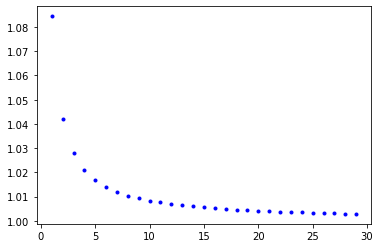

In [41]:
plot(r, b=30)